In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt

In [2]:
tickers = ['VTI', 'VTV', 'XLK', 'VEU', 'EEM', 'XLB', 'VCR', 'MS', 'GS', 'WFC', 'BAC', 'GLD']
portfolio = pd.DataFrame()
for t in tickers:
    portfolio[t] = wb.DataReader(t, data_source = 'yahoo', start = '2021-5-3')['Adj Close']

In [3]:
portfolio.head()

,VTI,VTV,XLK,VEU,EEM,XLB,VCR,MS,GS,WFC,BAC,GLD
Date,,,,,,,,,,,,
2009-12-31,45.464985,35.665218,19.190285,31.615555,33.142937,25.747629,40.810333,24.329384,142.472061,19.875179,13.059854,107.309998
2010-01-04,46.223129,36.262749,19.474844,32.594246,34.109280,26.551508,41.133190,25.406116,146.050003,20.118193,13.606186,109.800003
2010-01-05,46.400578,36.382259,19.449734,32.587006,34.356842,26.637365,41.394970,26.334919,148.632065,20.670488,14.048450,109.699997
2010-01-06,46.465103,36.501774,19.232136,32.731995,34.428719,27.090033,41.438587,26.671907,147.045639,20.699944,14.213213,111.510002
2010-01-07,46.658669,36.703434,19.156811,32.536255,34.229061,26.879305,41.796356,27.058222,149.923126,21.451065,14.681499,110.820000


In [4]:
portfolio.iloc[0]

VTI     45.464985
VTV     35.665218
XLK     19.190285
VEU     31.615555
EEM     33.142937
XLB     25.747629
VCR     40.810333
MS      24.329384
GS     142.472061
WFC     19.875179
BAC     13.059854
GLD    107.309998
Name: 2009-12-31 00:00:00, dtype: float64

<AxesSubplot:xlabel='Date'>

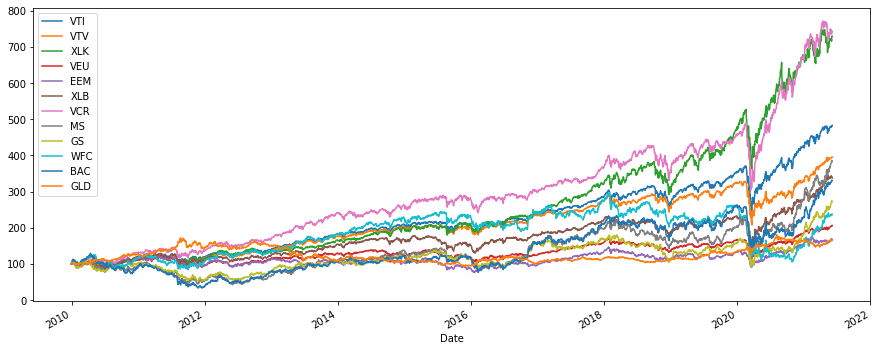

In [5]:
#Showing normalised returns over 10 years
(portfolio / portfolio.iloc[0] * 100).plot(figsize = (15, 6))

<AxesSubplot:xlabel='Date'>

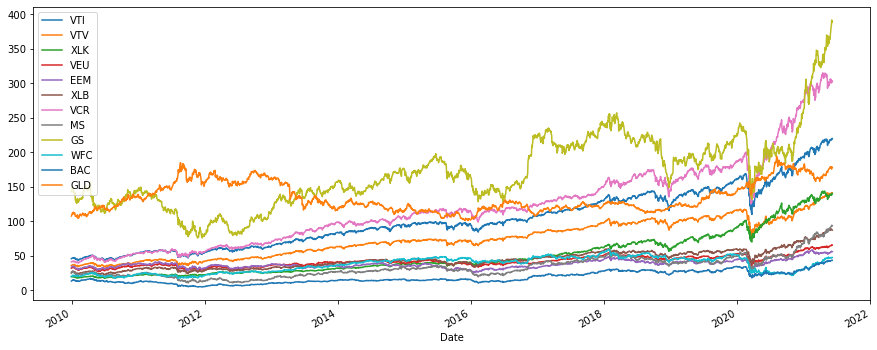

In [6]:
#Showing regular returns over 10 years
portfolio.plot(figsize = (15, 6 ))

In [7]:
#Calculating average daily returns * 250 trading days
returns = (portfolio / portfolio.shift(1)) - 1
annual_returns = returns.mean() * 250
annual_returns

VTI    0.152287
VTV    0.134485
XLK    0.193349
VEU    0.081068
EEM    0.070346
XLB    0.128770
VCR    0.192330
MS     0.179633
GS     0.129852
WFC    0.118789
BAC    0.166031
GLD    0.056464
dtype: float64

In [8]:
#weighted portfolio return based on USD 19k Value. Remaining USD 1k to be invested in single growth stocks
#and returns to be calculated separately
weights = np.array([0.1579, 0.1053, 0.1579, 0.1053, 0.1053, 0.1053, 0.1053, 0.0263, 0.0263, 0.0263, 0.0263, 0.0526])
np.dot(annual_returns, weights)
portfolio_wreturn = np.dot(annual_returns, weights)
print(str(round(portfolio_wreturn, 5) * 100) + ' %')

13.709 %


In [15]:
#calculating USD value of average portfolio weighted returns
portfolio_size = 19000
eqreturn = portfolio_wreturn * portfolio_size
eqreturn

2604.7698784505183

In [10]:
#calculating total equity return on USD 9500 initial investment. Note leverage is 2x which equals USD 19000
#this is estimated base return exluding dividends and fund expenses.
#This is your total expected return on investment. 27.419% per year

print(str(round(eqreturn / 9500, 5) * 100) + ' %')

27.419 %


In [11]:
#next we will calculate your portfolio value-at-risk, shows the total risk your portfolio has.
#calculate periodic returns

periodic_returns = portfolio.pct_change()
periodic_returns.tail()

,VTI,VTV,XLK,VEU,EEM,XLB,VCR,MS,GS,WFC,BAC,GLD
Date,,,,,,,,,,,,
2021-06-01,0.000413,0.001000,-0.004913,0.008877,0.020594,0.013981,0.000492,0.012754,0.028009,0.011558,0.012503,-0.002691
2021-06-02,0.001329,0.002498,0.006898,0.002624,0.001607,-0.008364,-0.003899,0.007057,0.002615,-0.009522,0.000466,0.004890
2021-06-03,-0.004440,0.001994,-0.009303,-0.007390,-0.010697,-0.000228,-0.012762,0.006360,0.013770,-0.007477,0.011459,-0.019578
2021-06-04,0.008690,0.003198,0.019217,0.009772,0.009011,0.002166,0.007130,0.006535,0.007023,0.010762,0.000462,0.010783
2021-06-07,0.000820,-0.001417,-0.000214,0.001075,-0.005001,-0.012172,0.002084,-0.007982,-0.008405,0.003194,-0.003467,0.004008


In [13]:
#generate covariance matrix
cov_matrix = periodic_returns.cov()
cov_matrix

,VTI,VTV,XLK,VEU,EEM,XLB,VCR,MS,GS,WFC,BAC,GLD
VTI,0.000122,0.000117,0.000131,0.000119,0.000129,0.000133,0.000124,0.000189,0.000152,0.000154,0.000181,0.000004
VTV,0.000117,0.000119,0.000117,0.000116,0.000123,0.000133,0.000114,0.000195,0.000157,0.000165,0.000192,0.000001
XLK,0.000131,0.000117,0.000164,0.000123,0.000138,0.000132,0.000133,0.000182,0.000149,0.000141,0.000169,0.000004
VEU,0.000119,0.000116,0.000123,0.000144,0.000157,0.000138,0.000119,0.000195,0.000153,0.000153,0.000180,0.000015
EEM,0.000129,0.000123,0.000138,0.000157,0.000201,0.000150,0.000131,0.000207,0.000163,0.000157,0.000189,0.000020
XLB,0.000133,0.000133,0.000132,0.000138,0.000150,0.000184,0.000132,0.000218,0.000174,0.000177,0.000209,0.000017
VCR,0.000124,0.000114,0.000133,0.000119,0.000131,0.000132,0.000143,0.000183,0.000149,0.000148,0.000174,0.000001
MS,0.000189,0.000195,0.000182,0.000195,0.000207,0.000218,0.000183,0.000504,0.000351,0.000313,0.000409,-0.000011
GS,0.000152,0.000157,0.000149,0.000153,0.000163,0.000174,0.000149,0.000351,0.000341,0.000254,0.000323,-0.000010
WFC,0.000154,0.000165,0.000141,0.000153,0.000157,0.000177,0.000148,0.000313,0.000254,0.000350,0.000330,-0.000013


In [17]:
#mean returns for each ticker
avg_returns = returns.mean()
#mean returns of weighted portfolio
port_mean = avg_returns.dot(weights)
#portfolio standard deviation
port_stdev = np.sqrt(weights.T.dot(cov_matrix).dot(weights))
#mean of investment
mean_investment = (1 + port_mean) * portfolio_size
#standard deviation of portfolio of USD 19k
stdev_investment = portfolio_size * port_stdev

#using 95% confidence interval
conf_level1 = 0.05
from scipy.stats import norm
cutoff1 = norm.ppf(conf_level1, mean_investment, stdev_investment)

#portfolio one-day VAR is really low at 1.815% (USD 344.44 / USD 19000)
var_1d1 = portfolio_size - cutoff1
var_1d1

344.4367548287046

1 day VaR @ 95% confidence: 344.44
2 day VaR @ 95% confidence: 487.11
3 day VaR @ 95% confidence: 596.58
4 day VaR @ 95% confidence: 688.87
5 day VaR @ 95% confidence: 770.18
6 day VaR @ 95% confidence: 843.69
7 day VaR @ 95% confidence: 911.29
8 day VaR @ 95% confidence: 974.21
9 day VaR @ 95% confidence: 1033.31
10 day VaR @ 95% confidence: 1089.2
11 day VaR @ 95% confidence: 1142.37
12 day VaR @ 95% confidence: 1193.16
13 day VaR @ 95% confidence: 1241.88
14 day VaR @ 95% confidence: 1288.76
15 day VaR @ 95% confidence: 1334.0
16 day VaR @ 95% confidence: 1377.75
17 day VaR @ 95% confidence: 1420.15
18 day VaR @ 95% confidence: 1461.32
19 day VaR @ 95% confidence: 1501.37
20 day VaR @ 95% confidence: 1540.37
21 day VaR @ 95% confidence: 1578.41
22 day VaR @ 95% confidence: 1615.55
23 day VaR @ 95% confidence: 1651.86
24 day VaR @ 95% confidence: 1687.39
25 day VaR @ 95% confidence: 1722.18
26 day VaR @ 95% confidence: 1756.29
27 day VaR @ 95% confidence: 1789.75
28 day VaR @ 95% con

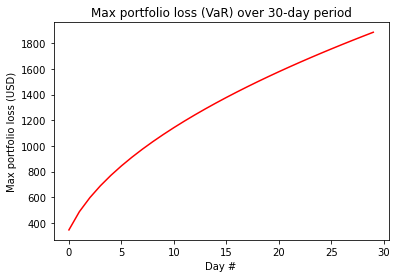

In [22]:
# Calculate n Day VaR

var_array = []

num_days = int(30)

for x in range(1, num_days+1):    

    var_array.append(np.round(var_1d1 * np.sqrt(x),2))

    print(str(x) + " day VaR @ 95% confidence: " + str(np.round(var_1d1 * np.sqrt(x),2)))



# Build plot
# Portfolio 30 day value at risk is excellent, < 10%.

plt.xlabel("Day #")

plt.ylabel("Max portfolio loss (USD)")

plt.title("Max portfolio loss (VaR) over 30-day period")

plt.plot(var_array, "r")